# Objective:
Build a model to predict the heart disease based on medical data.  
● **Dataset:** Heart Disease Dataset

● **Steps:**  
1. Perform EDA to explore relationships between features and outcomes.  
2. Apply feature selection and scale data for better model performance.  
3. Train models such as Gradient Boosting, SVM, or Neural Networks.  
4. Evaluate model performance using F1 Score and AUC-ROC curves.  
5. Provide insights for healthcare professionals based on model predictions.

● **Outcome:** A medical prediction model that provides actionable insights for early disease detection and prevention.  

# **Load Dataset & Libraries**

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_curve, auc

In [6]:
from google.colab import files

df = pd.read_csv("/content/dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# **Exploratory Data Analysis (EDA)**

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
     

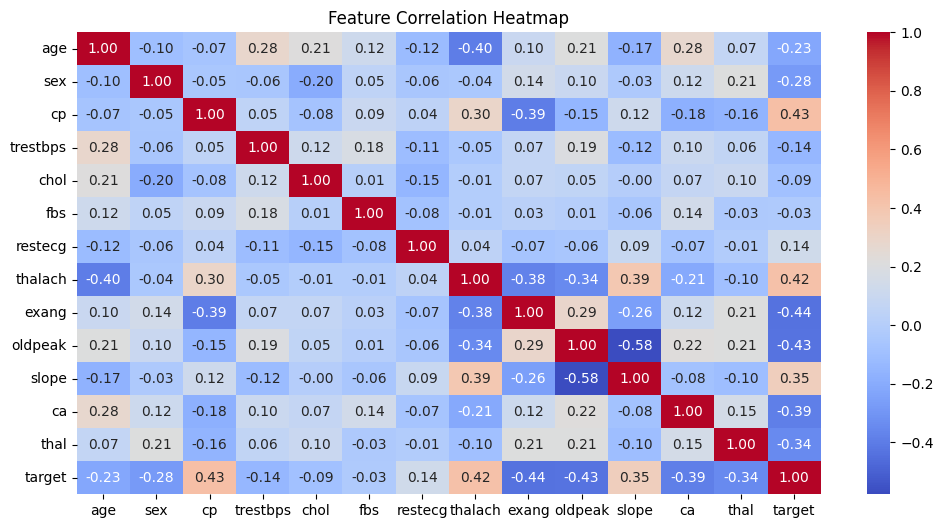

In [7]:
# Check for missing values
print(df.isnull().sum())

# Check data types and basic statistics
print(df.info())
print(df.describe())

# Plot correlation heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# **Data Preprocessing**

In [9]:
# Define Features & Target
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target Variable

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Train Models**

**1. Gradient Boosting**

In [10]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

print("Gradient Boosting Model Performance:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Model Performance:
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



**2. Support Vector Machine (SVM)**

In [11]:
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

print("SVM Model Performance:")
print(classification_report(y_test, y_pred_svm))

SVM Model Performance:
              precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



**3. Neural Network (MLP)**

In [12]:
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)

print("Neural Network Model Performance:")
print(classification_report(y_test, y_pred_mlp))

Neural Network Model Performance:
              precision    recall  f1-score   support

           0       0.73      0.68      0.70        28
           1       0.74      0.79      0.76        33

    accuracy                           0.74        61
   macro avg       0.74      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61



# **Model Evaluation using AUC-ROC Curve**

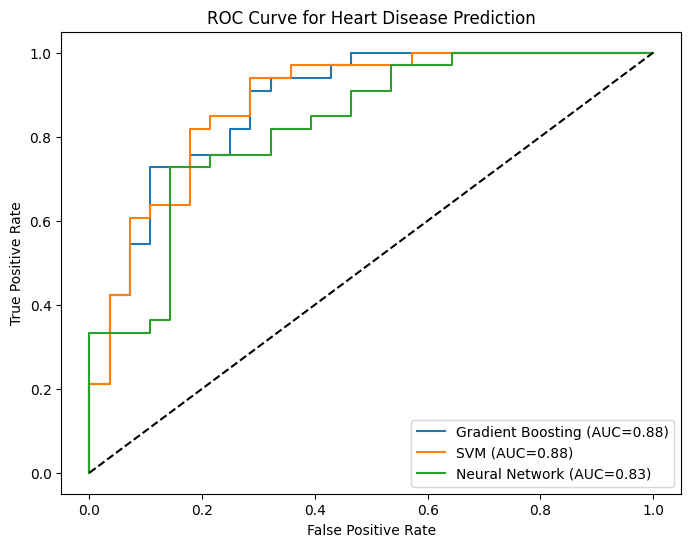

In [13]:
from sklearn.metrics import roc_auc_score

# Compute ROC curve
gb_probs = gb_model.predict_proba(X_test_scaled)[:, 1]
svm_probs = svm_model.predict_proba(X_test_scaled)[:, 1]
mlp_probs = mlp_model.predict_proba(X_test_scaled)[:, 1]

gb_auc = roc_auc_score(y_test, gb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)

# Plot ROC Curve
plt.figure(figsize=(8,6))
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_probs)

plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC={gb_auc:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC={svm_auc:.2f})')
plt.plot(fpr_mlp, tpr_mlp, label=f'Neural Network (AUC={mlp_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease Prediction')
plt.legend()
plt.show()


# **Interpret Results & Provide Insights**

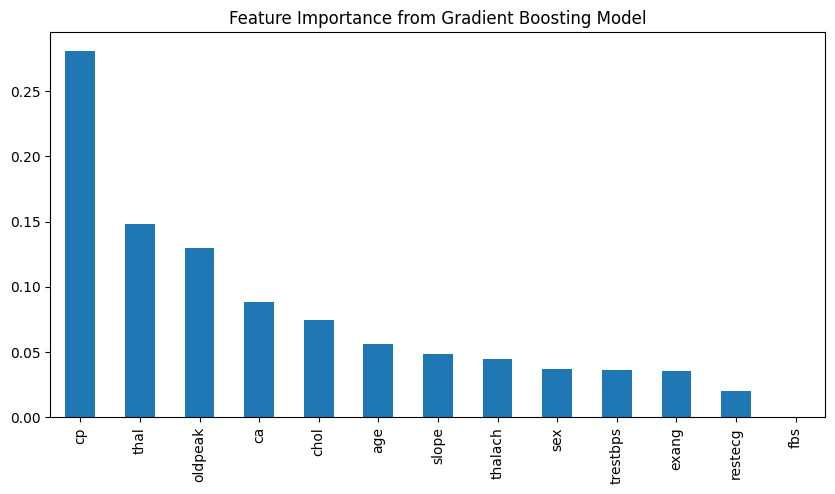

In [14]:
# Feature Importance (for Gradient Boosting)
feature_importance = pd.Series(gb_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Feature Importance from Gradient Boosting Model")
plt.show()

# **Insights for Healthcare Professionals**
* Top contributing factors for heart disease will be shown in the feature
importance graph.

* Models with higher AUC are better at distinguishing between patients with and without heart disease.

* Medical intervention can focus on high-risk factors like cholesterol, chest pain type, and ECG results.

